# Population Growth - Application

Here are three exercises that exhibit three applications of modeling:

1. extend a model to a new (but similar) system that follows the same mathematical model.
2. plot data and the prediction of the model; adjust parameters of the model to fit the data.
3. add terms to the mathematical model to include other interactions of the system.

# Exercise - Radioactive Decay

Carbon-14 decays with a rate:

$$\dot{Q}= \frac{\Delta Q}{\Delta t} = -1.20968\times 10^{-4} Q$$

where the decay rate constant $r=1.20968\times 10^{-4}$ is in units of $1/year$. In other words, the continuous decay rate is 0.0120968% per year. The number of undecayed Carbon-14 atoms remaining in a sample after a time interval $\Delta t$ is

$$Q_{now} = Q_{past} + \dot{Q}\Delta t$$

Using a loop, as you learned when modeling population growth, compute and graph $Q(t)$ up to 40,000 years, using a time step of 0.5 year and an initial number of 10,000 carbon-14 atoms. In the following working program, you only have to edit these two lines which are inside the loop:

```python
    # type the update equation for Qdot -- this is THE COMPUTATIONAL MODEL
    # type the update equation for Q
```

How many carbon-14 atoms remain (undecayed) at $t=40,000$ years?

In [2]:
# import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

At t = 40000 y, Q=10000 undecayed C-14 atoms.


<IPython.core.display.Javascript object>


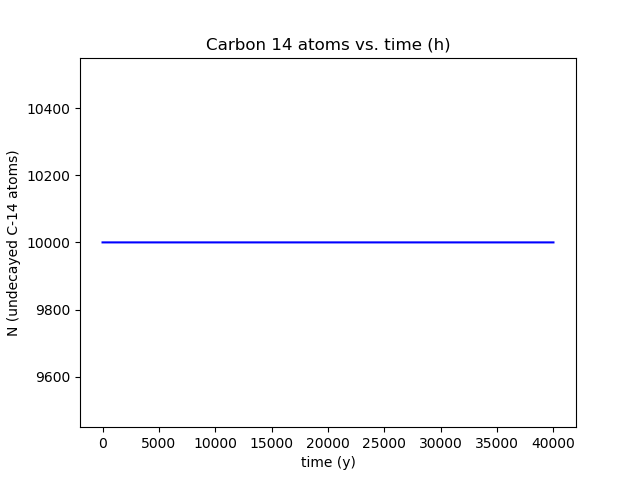

In [4]:
### Minimal Working Program

t = 0
dt = 0.5 #unit is year
r = 1.20968e-4
Q = 10000 #numer of C-14 atoms

tdata = []
Qdata = []

while t<40000:

    # type the update equation for Qdot -- this is THE COMPUTATIONAL MODEL
    # type the update equation for Q
    t = t + dt
    
    tdata.append(t)
    Qdata.append(Q)
    
print("At t = {:.0f} y, Q={:.0f} undecayed C-14 atoms.".format(t,Q))

fig = plt.figure()
plt.title('Carbon 14 atoms vs. time (h)')
plt.xlabel('time (y)')
plt.ylabel('N (undecayed C-14 atoms)')
plt.plot(tdata,Qdata,'b-')
plt.show()

# Exercise - Adjust Model to Fit Data

Do bacteria actually grow according to the Malthusian model of population growth? For a given set of data for bacteria, we will find its growth rate by comparing the prediction of a Malthusian model to measured data. We will adjust the growth rate manually until the model best-fits the measured data. **This is VERY different from doing a curve-fit to data.**

Bacterial cell density is measured using the absorbance of light. For a greater number of cells, more light is absorbed by the colony of bacteria. The absorbance is proportional to the number of cells. We will first read the data in the file `bacterial-growth.txt` and will store the data in lists `tmeas` and `Ameas`.

In [16]:
# we need a package to read the data file
import pandas as pd #used for data management
import numpy as np #used for numerical calculations with arrays

   t (min)  absorbance
0        0       0.101
1       30       0.109
2       60       0.130
3       90       0.157
4      120       0.211


<IPython.core.display.Javascript object>


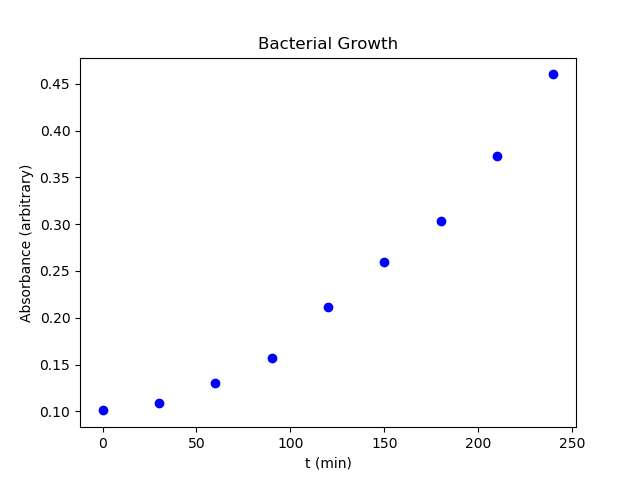

In [17]:
df = pd.read_csv('https://github.com/atitus/STLinATL/raw/master/workshop1/03a-pop-growth/bacterial-growth.txt', sep='\t') #called a dataframe
print(df.head()) #shows the first five rows of data, along with the column headings

tmeas = df['t (min)'] #use column heading to get data in that column
Ameas = df['absorbance'] #use column heading to get data in that column

fig = plt.figure()
plt.title('Bacterial Growth')
plt.xlabel("t (min)")
plt.ylabel('Absorbance (arbitrary)')
plt.plot(tmeas, Ameas, 'bo', label='data')
plt.show()

Now, adjust the parameters of your model (the initial absorbance and the growth rate) until the model fits the data. What is the initial absorbance and what is the growth rate $r$ for this population of bacteria?

<IPython.core.display.Javascript object>


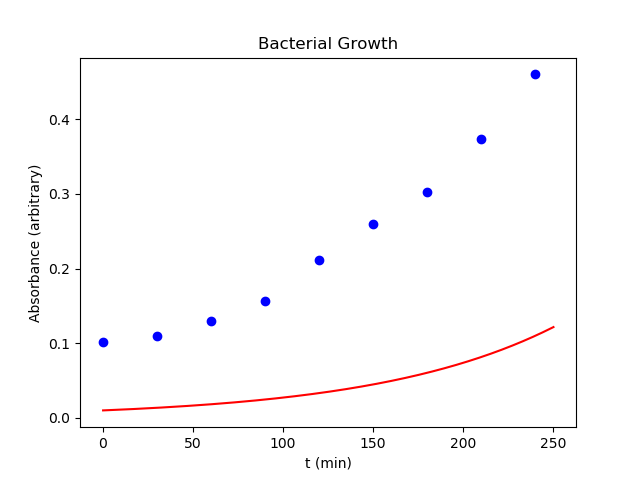

In [10]:
t = 0
dt = 0.3 #minutes
A = 0.01 #adjust this parameter
r = 0.01 #adjust this parameter

tmodel = [] #calculated data from your model
Amodel = [] #calculated data from your model.

while t<250:
    Adot = r*A
    A = A + Adot*dt
    t = t + dt
    
    tmodel.append(t)
    Amodel.append(A)
    
fig = plt.figure()
plt.title('Bacterial Growth')
plt.xlabel("t (min)")
plt.ylabel('Absorbance (arbitrary)')
plt.plot(tmeas,Ameas, 'bo', label='data')
plt.plot(tmodel,Amodel, 'r-', label='unconstrained growth prediction')
plt.show()

# Exercise - Constrained Growth

In the unconstrained population growth model, the **rate of change** $\dot{P}$ of the population is proportional to the growth rate $r$ and the population $P$.

$$\dot{P} = \frac{\Delta P}{\Delta t} = rP$$

Thus, the greater the population, the faster it grows. However, a populaton does not grow forever. Eventually it reaches the limit of what the environment can support. Perhaps there is no more food supply or there is competition among the population. The maximum population the environment can support is *the carrying capacity* $M$. This is called the **logistic growth model** or [Verhulst Model](https://www.maa.org/book/export/html/115630). For this model, we add a term for $\dot{P}$:

$$\dot{P} = rP - rP\left(\frac{P}{M}\right)$$

Note that when the population $P$ grows to the value $M$, $\dot{P} = rP - rP=0$ and the population will not grow any more. It will be constant at the value $M$. So the carrying capacity is the largest population and the population will remain constant at the value of $M$.

The computational model below is for uncontrained population growth starting at P=100 and growing at a rate $r=0.1\ h^{-1}$. Edit the mathematical model to include constrained growth. Suppose the carrying capacity is $M=1500$. Define the variable `M`, and edit the calculation for `Pdot` to include the second term for logistic growth such that $\dot{P} = rP - rP\left(\frac{P}{M}\right)$. Adjust the total time for the loop in order to give the system enough time to reach its carrying capacity.


At t = 20.000 h, P = 738.536372 cells.


<IPython.core.display.Javascript object>


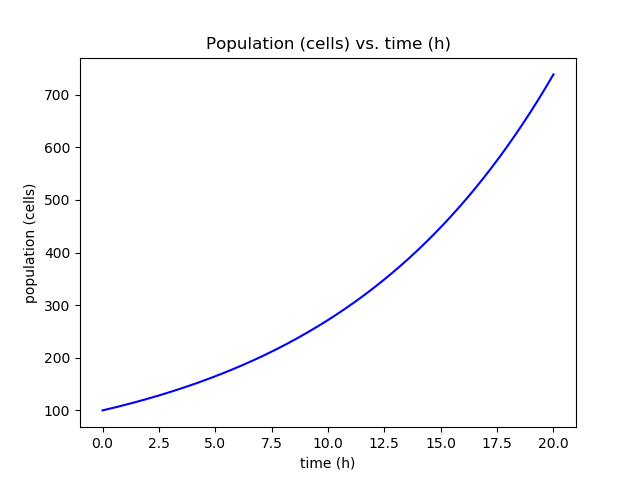

In [15]:
## define constants
r = 0.1
dt = 0.005

# define variables and their initial values
P = 100
t = 0

# create empty lists for storing data
tdata = []
Pdata = []

# append initial values of t and P to our lists
tdata.append(t)
Pdata.append(P)

# loop
while t<20:
    Pdot = r*P
    P = P + Pdot*dt
    t = t + dt
    
    tdata.append(t)
    Pdata.append(P)

# print the final t and P
print("At t = {:.3f} h, P = {:.6f} cells.".format(t, P))

# plot the calculated data
plt.figure()
plt.title('Population (cells) vs. time (h)')
plt.xlabel('time (h)')
plt.ylabel('population (cells)')
plt.plot(tdata,Pdata,'b-')
plt.show()